In [1]:
from teltrace.gen_voigt import voigt,generate_voigt_profile 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


ModuleNotFoundError: No module named 'teltrace'

[-10.          -9.98998999  -9.97997998 ...   9.97997998   9.98998999
  10.        ]


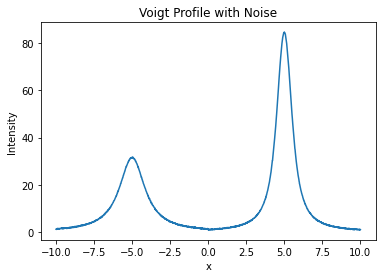

In [2]:

x1 = np.linspace(-10, 0, 1000)
x2=np.linspace(0,10,1000)

# Set initial parameter values
sigma1 = .10
gamma1 = 1.0
amplitude1 = 100.0
noise_std = 0.1  # Standard deviation of the Gaussian noise

sigma2 = .2
gamma2 = .5
amplitude2 = 150

# Generate Voigt profile with noise
y1 = generate_voigt_profile(x1,-5, sigma1, gamma1, amplitude1, noise_std)
y2 = generate_voigt_profile(x2, 5, sigma2, gamma2, amplitude2, noise_std)
x = np.concatenate((x1,x2),axis=None)
y = np.concatenate((y1,y2),axis = None)
print(x)
# Plot the Voigt profile with noise
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Intensity')
plt.title('Voigt Profile with Noise')
plt.show()

In [3]:
data = np.column_stack((x, y))
np.savetxt('voigt_doublepeak_data.csv', data, delimiter=',', header='x,y', fmt='%.6f', comments='')

In [2]:
from teltrace.load import file_read

ModuleNotFoundError: No module named 'teltrace'

In [5]:
spectrum = file_read('data/voigt_doublepeak_data.csv')

In [6]:
from fit import fit_voigt,plot_fit_voigt

In [7]:
x=spectrum['Wavenumber'];y=spectrum['Intensity']

In [8]:
x = x.to_numpy()
y = y.to_numpy()


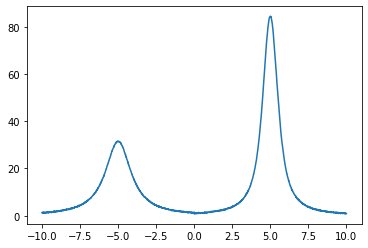

In [9]:
plt.plot(x,y)

In [10]:
peaks = find_peaks(y,height=20,prominence=10)
peaks

(array([ 496, 1501]),
 {'peak_heights': array([31.603902, 84.5377  ]),
  'prominences': array([30.478273, 83.746132]),
  'left_bases': array([  20, 1000]),
  'right_bases': array([1000, 1993])})

In [11]:
for i in peaks[0]:
    print(i,x[i],y[i])

496 -5.035035 31.603902
1501 5.015015 84.5377


In [14]:
popt,pcov=fit_voigt(x=x,y=y,bounds=(-10,0))
print(popt)

[-2.12829309e-05 -4.90400501e+00 -4.90099515e-07 -1.00000000e+01]


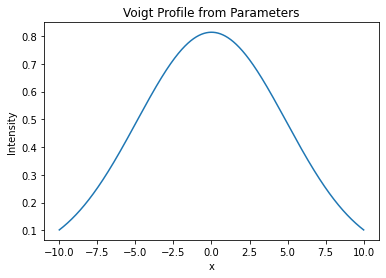

(array([-2.12829309e-05, -4.90400501e+00, -4.90099515e-07, -1.00000000e+01]),
 <module 'matplotlib.pyplot' from '/Users/bensappey/opt/anaconda3/envs/kpic/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

In [13]:
plot_fit_voigt(x=x,y=y,bounds=())